## Energy Consumption Forecasting System  

##### About the Dataset  
PJM Hourly Energy Consumption Data
PJM Interconnection LLC (PJM) is a regional transmission organization (RTO) in the United States. It is part of the Eastern Interconnection grid operating an electric transmission system serving all or parts of Delaware, Illinois, Indiana, Kentucky, Maryland, Michigan, New Jersey, North Carolina, Ohio, Pennsylvania, Tennessee, Virginia, West Virginia, and the District of Columbia.  

The hourly power consumption data comes from PJM's website and are in megawatts (MW).  

The regions have changed over the years so data may only appear for certain dates per region.  

In [34]:
## importing required libraries

import pandas as pd ## for data manipulation and data handling
import numpy as np ## for applying any mathematical calculations to the dataset
import warnings
warnings.filterwarnings("ignore")

In [35]:
## load the dataset
df = pd.read_parquet("C:/Users/himan/Desktop/Projects/Energy_Forecasting_System/data/raw-data/est_hourly.parquet")
print(df.head()) ## print the first 5 rows of the dataset 

                           AEP  COMED  DAYTON  DEOK  DOM  DUQ  EKPC  FE  NI  \
Datetime                                                                      
1998-12-31 01:00:00+00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   
1998-12-31 02:00:00+00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   
1998-12-31 03:00:00+00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   
1998-12-31 04:00:00+00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   
1998-12-31 05:00:00+00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   

                           PJME  PJMW  PJM_Load  
Datetime                                         
1998-12-31 01:00:00+00:00   NaN   NaN   29309.0  
1998-12-31 02:00:00+00:00   NaN   NaN   28236.0  
1998-12-31 03:00:00+00:00   NaN   NaN   27692.0  
1998-12-31 04:00:00+00:00   NaN   NaN   27596.0  
1998-12-31 05:00:00+00:00   NaN   NaN   27888.0  


In [36]:
df.columns ## print the columns of the dataset

Index(['AEP', 'COMED', 'DAYTON', 'DEOK', 'DOM', 'DUQ', 'EKPC', 'FE', 'NI',
       'PJME', 'PJMW', 'PJM_Load'],
      dtype='object')

In [37]:
df.index ## print the index of the dataset

DatetimeIndex(['1998-12-31 01:00:00+00:00', '1998-12-31 02:00:00+00:00',
               '1998-12-31 03:00:00+00:00', '1998-12-31 04:00:00+00:00',
               '1998-12-31 05:00:00+00:00', '1998-12-31 06:00:00+00:00',
               '1998-12-31 07:00:00+00:00', '1998-12-31 08:00:00+00:00',
               '1998-12-31 09:00:00+00:00', '1998-12-31 10:00:00+00:00',
               ...
               '2018-01-01 15:00:00+00:00', '2018-01-01 16:00:00+00:00',
               '2018-01-01 17:00:00+00:00', '2018-01-01 18:00:00+00:00',
               '2018-01-01 19:00:00+00:00', '2018-01-01 20:00:00+00:00',
               '2018-01-01 21:00:00+00:00', '2018-01-01 22:00:00+00:00',
               '2018-01-01 23:00:00+00:00', '2018-01-02 00:00:00+00:00'],
              dtype='datetime64[ms, UTC]', name='Datetime', length=178262, freq=None)

### Data Exploration

In [38]:
df.info() ## to get the information about the dataset

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 178262 entries, 1998-12-31 01:00:00+00:00 to 2018-01-02 00:00:00+00:00
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   AEP       121273 non-null  float64
 1   COMED     66497 non-null   float64
 2   DAYTON    121275 non-null  float64
 3   DEOK      57739 non-null   float64
 4   DOM       116189 non-null  float64
 5   DUQ       119068 non-null  float64
 6   EKPC      45334 non-null   float64
 7   FE        62874 non-null   float64
 8   NI        58450 non-null   float64
 9   PJME      145366 non-null  float64
 10  PJMW      143206 non-null  float64
 11  PJM_Load  32896 non-null   float64
dtypes: float64(12)
memory usage: 17.7 MB


In [39]:
df.shape ## to check the shape of the dataset

(178262, 12)

In [40]:
## checking for null values in the dataset
df.isnull().sum()

AEP          56989
COMED       111765
DAYTON       56987
DEOK        120523
DOM          62073
DUQ          59194
EKPC        132928
FE          115388
NI          119812
PJME         32896
PJMW         35056
PJM_Load    145366
dtype: int64

There are alot of Null Values in the dataset as we can see from above.

In [41]:
## checking for duplicate values in the dataset
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 16181


### Data Cleaning

In our Dataset, we can clearly see that we have so much of missing values. They need to be handled carefully for Forecasting System. We cannot drop those rows as that would shrink our dataset and also harm our model's performance.

In [42]:
## making Datetime column as index
print(type(df.index)) ## check the type of index

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [43]:
## handling missing values based on datetime index
## interpolate missing values for each column
df = df.interpolate(method='time')

Role of Interpolate method -  
- It does not drop any data.
- It fills gaps by estimating values using the trend of your data over time.
- This helps keep your dataset complete and consistent for forecasting.

In [44]:
## checking for missing values again
print(f"Number of missing values after interpolation: {df.isnull().sum().sum()}")

Number of missing values after interpolation: 808774


The Interpolate method is unable to fill the missing values. So now we are going to use forward fill and backward fill to fill the NA values.

In [45]:
## filling the missing values using forwar fill and backward fill
df = df.fillna(method='ffill').fillna(method='bfill')

## checking again for missing values
print(f"Number of missing values after ffill/bfill: {df.isnull().sum().sum()}")

Number of missing values after ffill/bfill: 0


It means we have successfully filled all the NA values.

#### Handling duplicates

In [46]:
## removing all the duplicate rows
df = df.drop_duplicates()
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")

Number of duplicate rows after removal: 0


we have succesfully removed all duplicate values from the dataset.

In [47]:
df.describe() ## to get the statistical information about the dataset

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
count,162080.000000,162080.000000,162080.000000,162080.000000,162080.000000,162080.000000,162080.000000,162080.000000,162080.000000,162080.000000,162080.000000,162080.000000
mean,14945.989422,10564.957829,1927.625568,3002.032398,10468.390289,1605.527585,1734.484199,6692.014036,10576.408786,31500.938894,5532.465912,31449.042059
std,2444.645785,1639.191971,389.786144,366.144643,2200.697507,273.400328,281.023379,1512.722959,1661.332619,6353.656713,943.207236,2242.168951
min,9581.000000,7237.000000,982.000000,907.000000,1253.000000,1014.000000,514.000000,0.000000,7003.000000,14544.000000,487.000000,17461.000000
25%,13478.000000,9970.000000,1596.000000,2945.000000,9389.000000,1458.000000,1800.000000,6222.000000,9810.000000,26498.000000,4965.000000,31569.000000
50%,14219.000000,9970.000000,1849.000000,2945.000000,9576.000000,1499.000000,1861.000000,6222.000000,10042.000000,30641.000000,5368.000000,31569.000000
75%,16438.000000,10639.000000,2173.000000,2945.000000,11514.000000,1741.000000,1861.000000,7229.000000,10344.250000,35016.000000,6136.000000,31569.000000
max,25695.000000,23753.000000,3746.000000,5445.000000,21651.000000,3054.000000,3490.000000,14032.000000,23631.000000,62009.000000,9594.000000,54030.000000


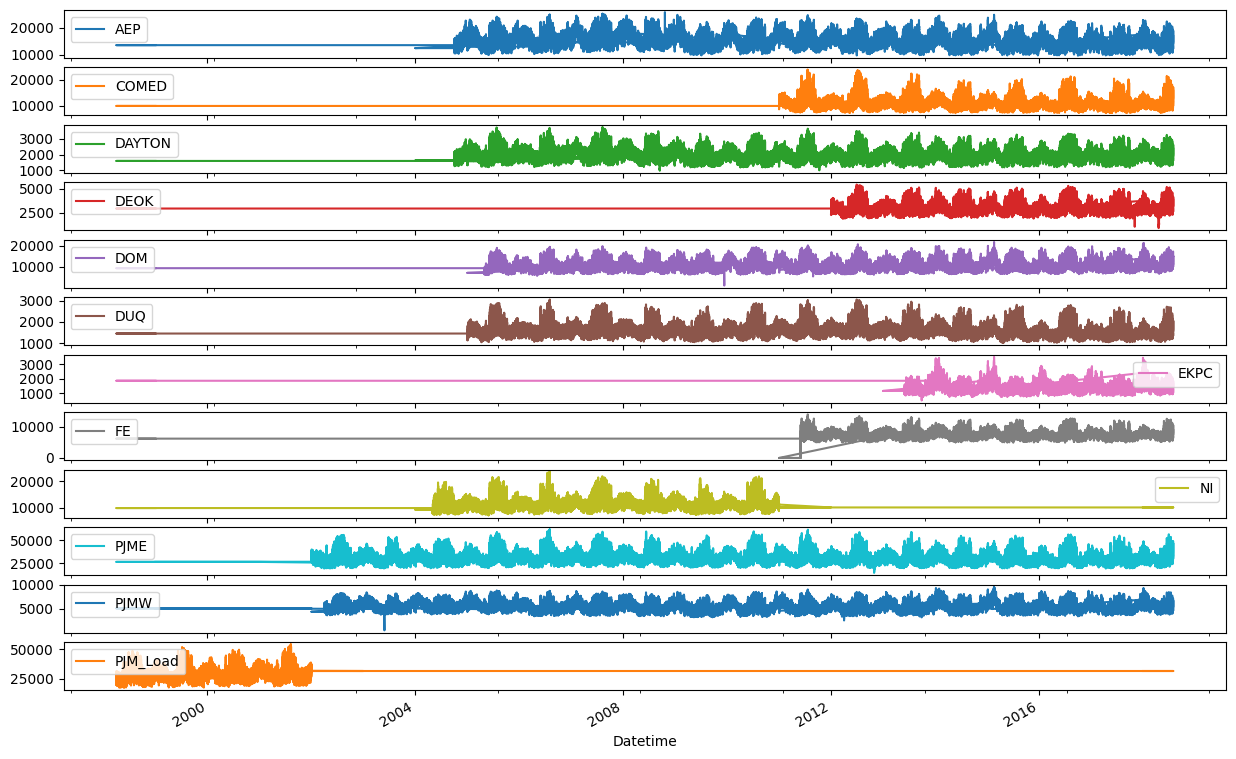

In [48]:
## visualizing distributions to spot outliers
import matplotlib.pyplot as plt
df.plot(subplots=True, figsize=(15,10))
plt.show()

From the .describe() method, we can see that our dataset contains outliers. We need to handle them so that they don't impact our model's prediction.

#### Handling Outliers

For handling outliers, i am going to perform IQR, and remove the outlier rows. Then i am going to check the shape of the dataset and i loose a quite good amount of data, i'll perform Capping method.

In [49]:
## calculating IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

## removing outliers based on IQR
df_outliers = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
print(f"Original shape: {df.shape}")
print(f"Shape after removing outliers: {df_outliers.shape}")

Original shape: (162080, 12)
Shape after removing outliers: (40282, 12)


We can see that IQR method has removed more than half of our data. So its better to perform cap method to handle the outliers.

In [51]:
## Cap (clip) outliers to the IQR bounds
df_capped = df.clip(lower=lower_bound, upper=upper_bound, axis=1)

df_capped.describe() ## to get the statistical information about the dataset after capping

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
count,162080.000000,162080.000000,162080.000000,162080.0,162080.000000,162080.000000,162080.000000,162080.000000,162080.000000,162080.000000,162080.000000,162080.0
mean,14925.080883,10276.759548,1925.706231,2945.0,10382.866350,1594.788361,1826.655815,6715.251943,10169.303809,31428.719774,5528.371887,31569.0
std,2385.820971,752.147628,383.548890,0.0,1979.152329,242.246837,68.970771,943.531399,588.430840,6132.308071,931.234466,0.0
min,9581.000000,8966.500000,982.000000,2945.0,6201.500000,1033.500000,1708.500000,4711.500000,9008.625000,14544.000000,3208.500000,31569.0
25%,13478.000000,9970.000000,1596.000000,2945.0,9389.000000,1458.000000,1800.000000,6222.000000,9810.000000,26498.000000,4965.000000,31569.0
50%,14219.000000,9970.000000,1849.000000,2945.0,9576.000000,1499.000000,1861.000000,6222.000000,10042.000000,30641.000000,5368.000000,31569.0
75%,16438.000000,10639.000000,2173.000000,2945.0,11514.000000,1741.000000,1861.000000,7229.000000,10344.250000,35016.000000,6136.000000,31569.0
max,20878.000000,11642.500000,3038.500000,2945.0,14701.500000,2165.500000,1952.500000,8739.500000,11145.625000,47793.000000,7892.500000,31569.0


We can see that we have clipped the outliers into our upper bound.

In [53]:
## saving the cleaned dataset
df_capped.to_parquet("C:/Users/himan/Desktop/Projects/Energy_Forecasting_System/data/processed-data/est_hourly_cleaned.parquet")